## Exploração e Modelos ##

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)

In [123]:
import boto3
from botocore.exceptions import NoCredentialsError, PartialCredentialsError

bucket_name = "obesitytech3"
file_name = "ObesityDataSet_raw_and_data_sinthetic.csv"
download_path = f"./{file_name}"  

s3 = boto3.client('s3')

try:
    s3.download_file(bucket_name, file_name, download_path)
    print(f"Arquivo {file_name} baixado com sucesso para {download_path}")
except NoCredentialsError:
    print("Erro: Credenciais não encontradas.")
except PartialCredentialsError:
    print("Erro: Credenciais parciais fornecidas.")
except Exception as e:
    print(f"Erro: {str(e)}")

Arquivo ObesityDataSet_raw_and_data_sinthetic.csv baixado com sucesso para ./ObesityDataSet_raw_and_data_sinthetic.csv


In [ ]:
# Lendo arquivo CSV
df = pd.read_csv(r'C:\Users\Davi Lee\Documents\ML-Obesidade\model\ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [86]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [88]:
# Verificar valores nulos
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [89]:
# Verificando duplicatas
df.duplicated().sum()

np.int64(24)

In [90]:
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Limpeza dos Dados

In [91]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [92]:
df.rename(columns={
    'Gender': 'GENERO',
    'Age': 'IDADE',
    'Height': 'ALTURA',
    'Weight': 'PESO',
    'family_history_with_overweight': 'HISTORICO_FAMILIAR_DE_SOBREPOESO',
    'FAVC': 'CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS',
    'FCVC': 'FREQUENCIA_CONSUMO_VEGETAIS',
    'NCP': 'NUMERO_REFACOES_DIA',
    'CAEC': 'CONSUMO_ALIMENTOS_ENTRE_REFACOES',
    'SMOKE': 'FUMA',
    'CH2O': 'INGESTAO_AGUA',
    'SCC': 'MONITORA_CALORIAS',
    'FAF': 'FREQUENCIA_ATIVIDADE_FISICA',
    'TUE': 'USO_TECNOLOGIA',
    'CALC': 'CONSUMO_ALCOOL',
    'MTRANS': 'MEIO_TRANSPORTE',
    'NObeyesdad': 'POSSUI_OBESIDADE'
}, inplace=True)
df.head()

,GENERO,IDADE,ALTURA,PESO,HISTORICO_FAMILIAR_DE_SOBREPOESO,CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS,FREQUENCIA_CONSUMO_VEGETAIS,NUMERO_REFACOES_DIA,CONSUMO_ALIMENTOS_ENTRE_REFACOES,FUMA,INGESTAO_AGUA,MONITORA_CALORIAS,FREQUENCIA_ATIVIDADE_FISICA,USO_TECNOLOGIA,CONSUMO_ALCOOL,MEIO_TRANSPORTE,POSSUI_OBESIDADE
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [93]:
## Tratando dados para treinamento
df_train = df.copy() 

df_train['GENERO'] = df['GENERO'].replace({'Female': 0, 'Male': 1})
df_train['HISTORICO_FAMILIAR_DE_SOBREPOESO'] = df['HISTORICO_FAMILIAR_DE_SOBREPOESO'].replace({'no': 0, 'yes': 1})
df_train['CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS'] = df['CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS'].replace({'no': 0, 'yes': 1})
df_train['FREQUENCIA_CONSUMO_VEGETAIS'] = df['FREQUENCIA_CONSUMO_VEGETAIS'].replace({'no': 0, 'yes': 1})
df_train['FUMA'] = df['FUMA'].replace({'no': 0, 'yes': 1})  
df_train['MONITORA_CALORIAS'] = df['MONITORA_CALORIAS'].replace({'no': 0, 'yes': 1})
df_train['POSSUI_OBESIDADE'] = df['POSSUI_OBESIDADE'].replace({
    'Insufficient_Weight': 0,
    'Normal_Weight': 0,
    'Overweight_Level_I': 0,
    'Overweight_Level_II': 0,
    'Obesity_Type_I': 1,
    'Obesity_Type_II': 1,
    'Obesity_Type_III': 1
})
df_train['CONSUMO_ALIMENTOS_ENTRE_REFACOES'] = df['CONSUMO_ALIMENTOS_ENTRE_REFACOES'].replace({
    'Never': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3,
    'no': 0
})
df_train['CONSUMO_ALCOOL'] = df['CONSUMO_ALCOOL'].replace({
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
})

df_train['MEIO_TRANSPORTE'] = df['MEIO_TRANSPORTE'].replace({
    'Walking': 0,
    'Bike': 1,
    'Motorbike': 2,
    'Public_Transportation': 3,
    'Automobile': 4
})

df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   GENERO                                 2111 non-null   int64  
 1   IDADE                                  2111 non-null   int64  
 2   ALTURA                                 2111 non-null   float64
 3   PESO                                   2111 non-null   float64
 4   HISTORICO_FAMILIAR_DE_SOBREPOESO       2111 non-null   int64  
 5   CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS  2111 non-null   int64  
 6   FREQUENCIA_CONSUMO_VEGETAIS            2111 non-null   float64
 7   NUMERO_REFACOES_DIA                    2111 non-null   float64
 8   CONSUMO_ALIMENTOS_ENTRE_REFACOES       2111 non-null   int64  
 9   FUMA                                   2111 non-null   int64  
 10  INGESTAO_AGUA                          2111 non-null   float64
 11  MONI

C:\Users\Davi Lee\AppData\Local\Temp\ipykernel_30452\1228634514.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['GENERO'] = df['GENERO'].replace({'Female': 0, 'Male': 1})
C:\Users\Davi Lee\AppData\Local\Temp\ipykernel_30452\1228634514.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['HISTORICO_FAMILIAR_DE_SOBREPOESO'] = df['HISTORICO_FAMILIAR_DE_SOBREPOESO'].replace({'no': 0, 'yes': 1})
C:\Users\Davi Lee\AppData\Local\Temp\ipykernel_30452\1228634514.py:6: FutureWarning: Downcasting behavior in `replace` is

,GENERO,IDADE,ALTURA,PESO,HISTORICO_FAMILIAR_DE_SOBREPOESO,CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS,FREQUENCIA_CONSUMO_VEGETAIS,NUMERO_REFACOES_DIA,CONSUMO_ALIMENTOS_ENTRE_REFACOES,FUMA,INGESTAO_AGUA,MONITORA_CALORIAS,FREQUENCIA_ATIVIDADE_FISICA,USO_TECNOLOGIA,CONSUMO_ALCOOL,MEIO_TRANSPORTE,POSSUI_OBESIDADE
0,0,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,0
1,0,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,0
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,0
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,0


Removendo Duplicatas

In [94]:
df.drop_duplicates(inplace=True)
df_train.drop_duplicates(inplace=True)


In [95]:
print(df.shape)
print(df_train.shape)

(2087, 17)
(2087, 17)


Verificando Outliers

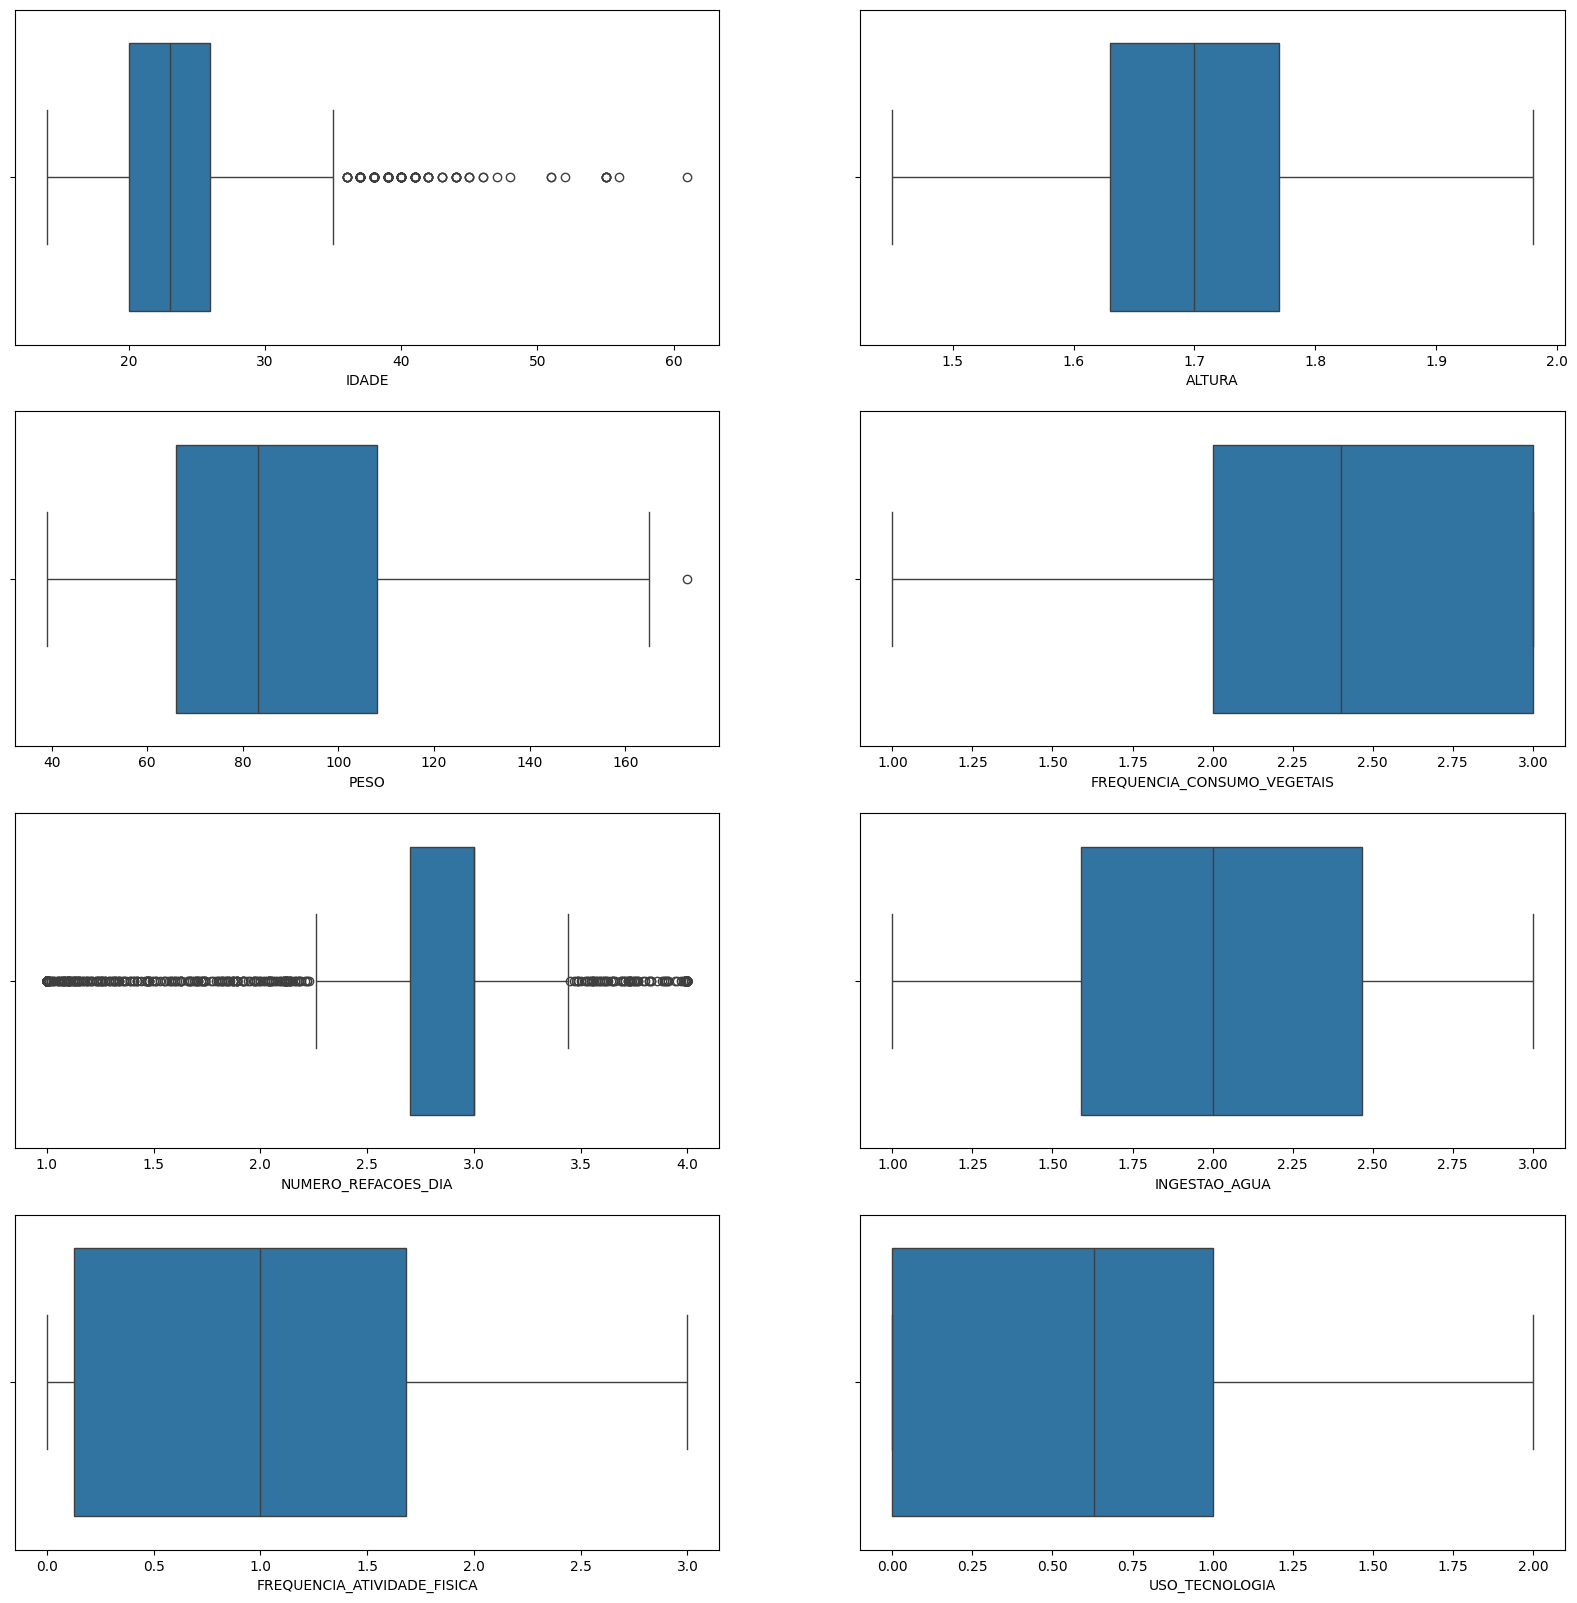

In [96]:
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(colunas_numericas):
    plt.subplot(4, 2, i + 1)  
    sns.boxplot(x=df[col])  

plt.show()


In [97]:
df_train.head()

,GENERO,IDADE,ALTURA,PESO,HISTORICO_FAMILIAR_DE_SOBREPOESO,CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS,FREQUENCIA_CONSUMO_VEGETAIS,NUMERO_REFACOES_DIA,CONSUMO_ALIMENTOS_ENTRE_REFACOES,FUMA,INGESTAO_AGUA,MONITORA_CALORIAS,FREQUENCIA_ATIVIDADE_FISICA,USO_TECNOLOGIA,CONSUMO_ALCOOL,MEIO_TRANSPORTE,POSSUI_OBESIDADE
0,0,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,0
1,0,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,0
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,0
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,0


## Análise Exploratória

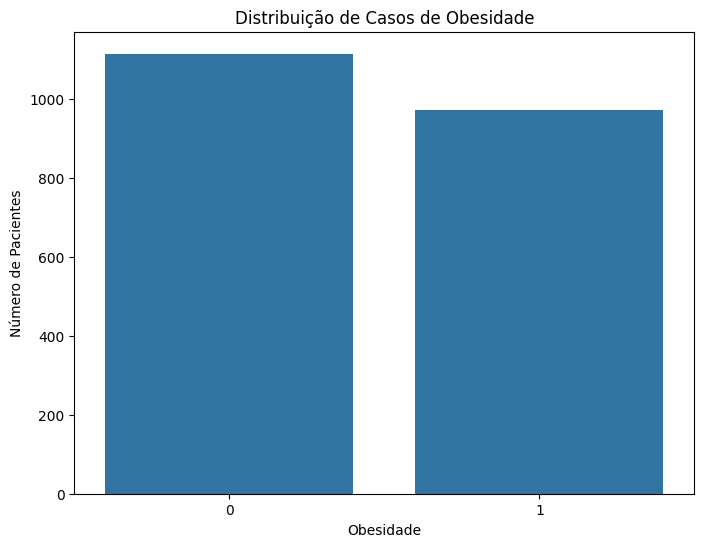

In [98]:
# Distribuição da variável alvo
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='POSSUI_OBESIDADE')
plt.title('Distribuição de Casos de Obesidade')
plt.xlabel('Obesidade')
plt.ylabel('Número de Pacientes')
plt.show()

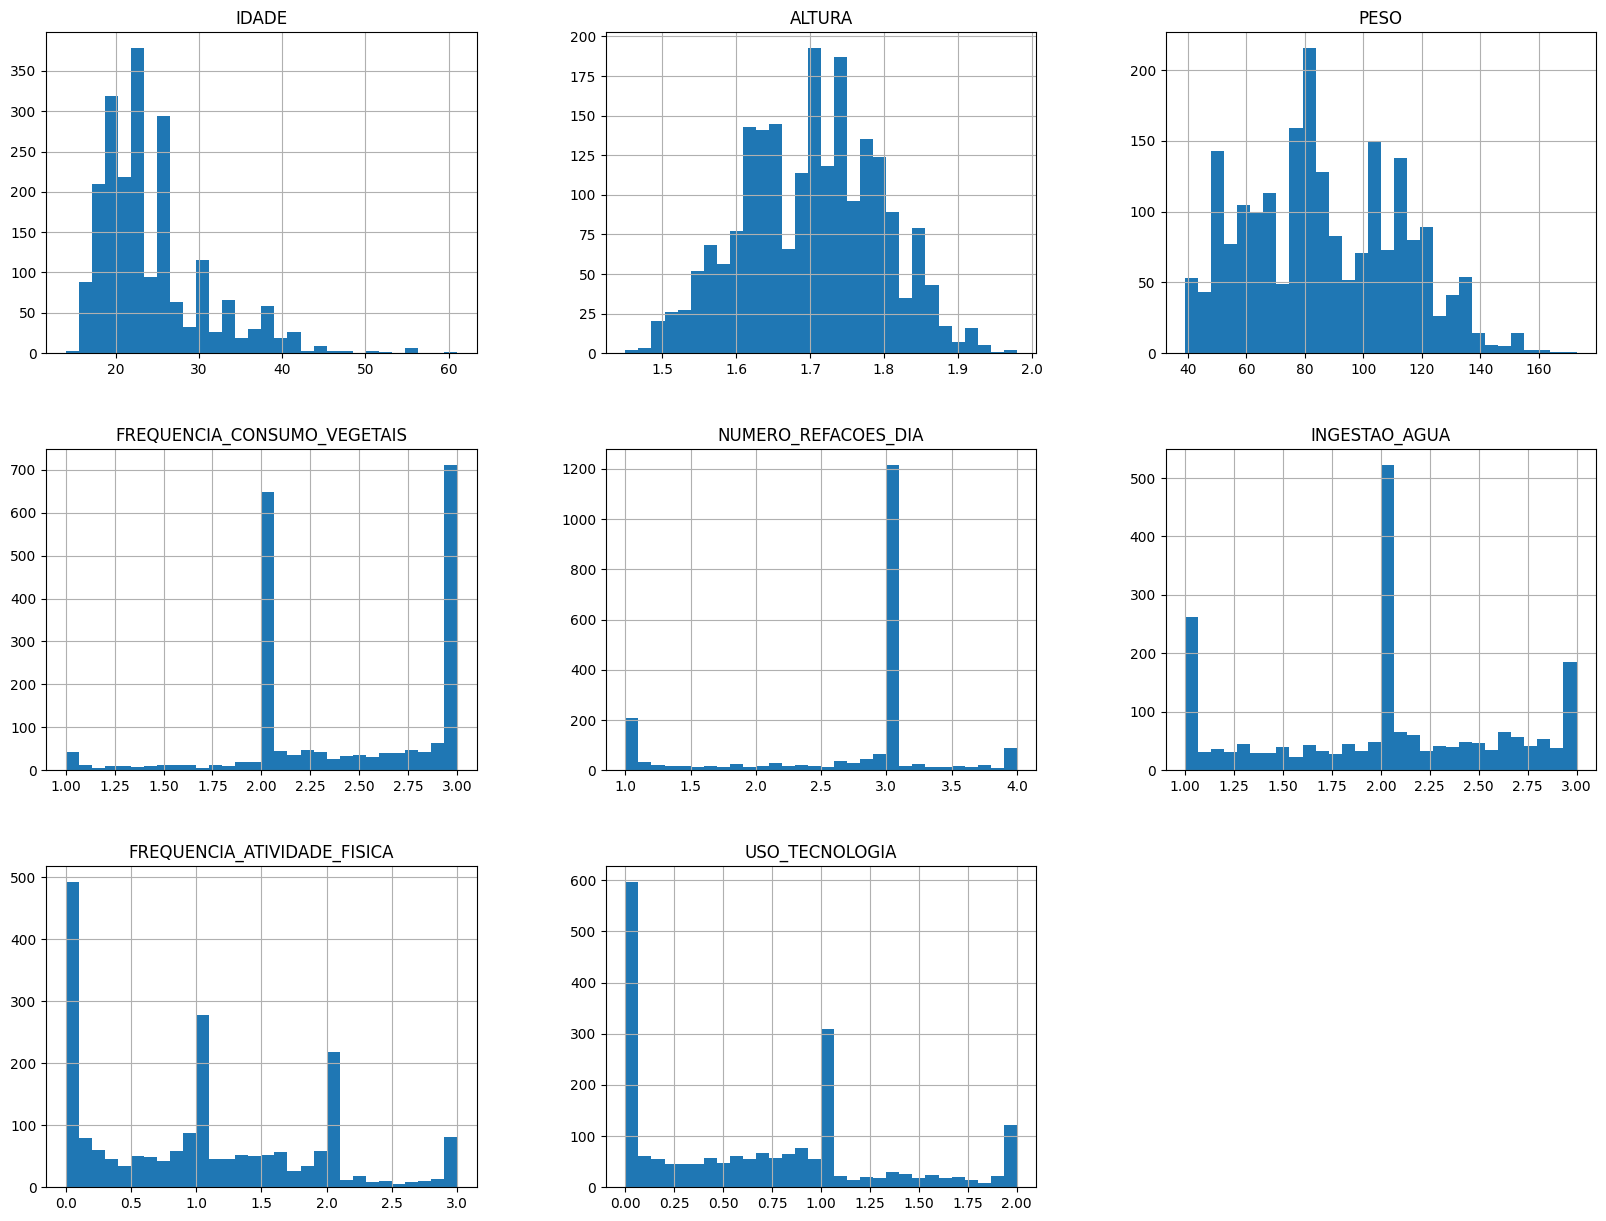

In [99]:
# Histograma de todas as colunas
df.hist(bins=30, figsize=(20, 15))
plt.show()

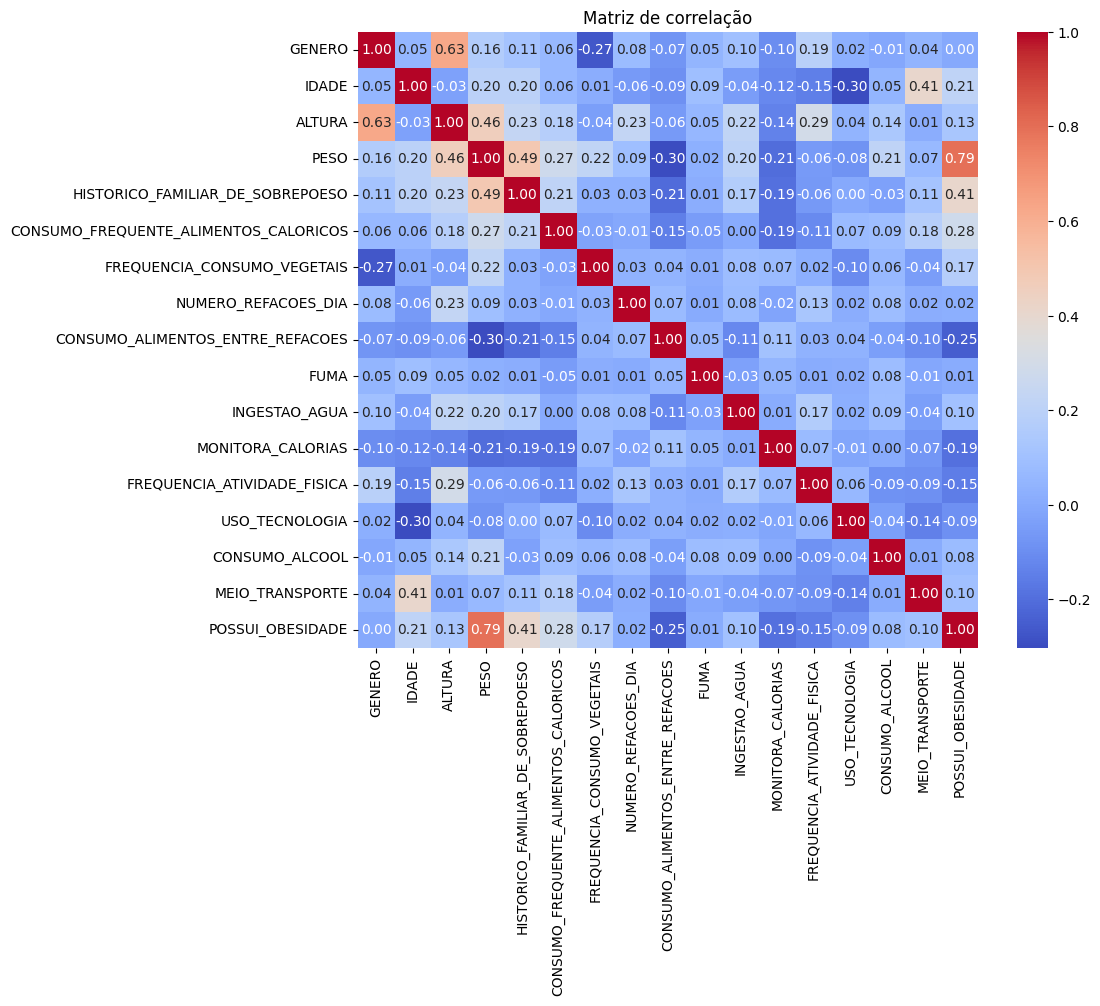

In [100]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação')
plt.show()

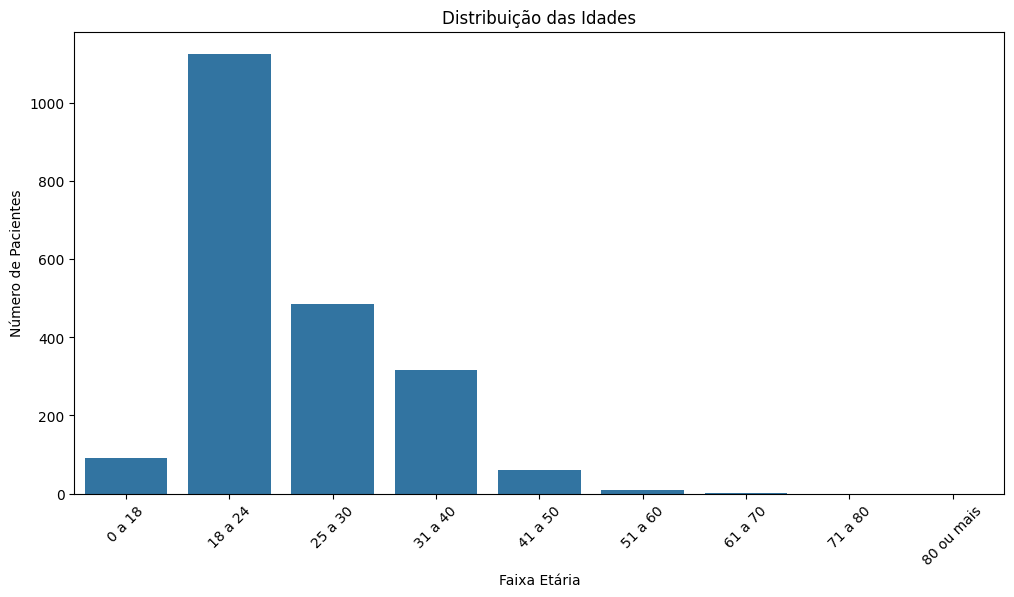

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

df_idades = df_train.copy()
faixas_etarias = [0, 18, 24, 30, 40, 50, 60, 70, 80, float('inf')]  
labels = ['0 a 18', '18 a 24', '25 a 30', '31 a 40', '41 a 50', '51 a 60', '61 a 70', '71 a 80', '80 ou mais']  
df_idades['FAIXA_ETARIA'] = pd.cut(df_idades['IDADE'], bins=faixas_etarias, labels=labels, right=False)
df_idades.head()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_idades, x='FAIXA_ETARIA', order=labels)
plt.title('Distribuição das Idades')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.show()

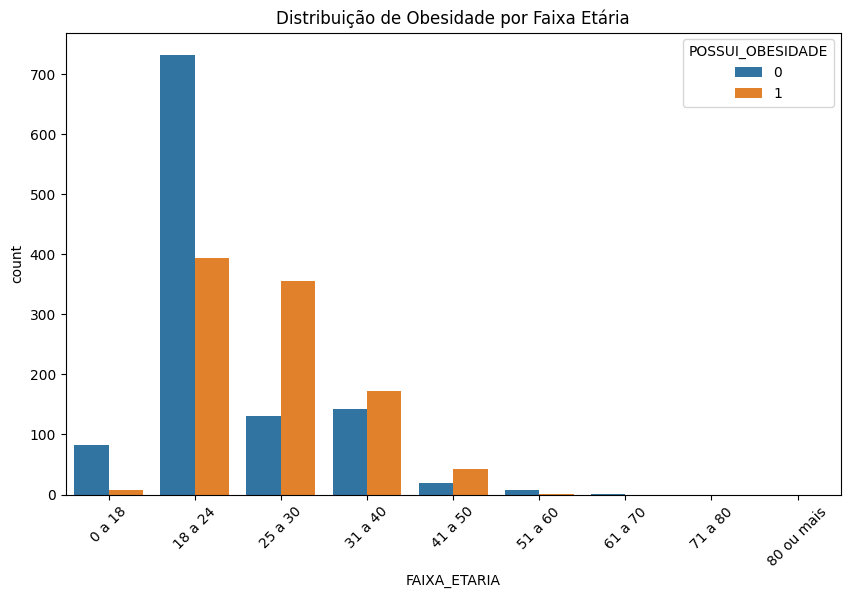

In [124]:
# Relação entre Idade e Diabetes
plt.figure(figsize=(10,6))
sns.countplot(data=df_idades, x='FAIXA_ETARIA', hue='POSSUI_OBESIDADE', order=labels)
plt.title('Distribuição de Obesidade por Faixa Etária')
plt.xticks(rotation=45)
plt.show()

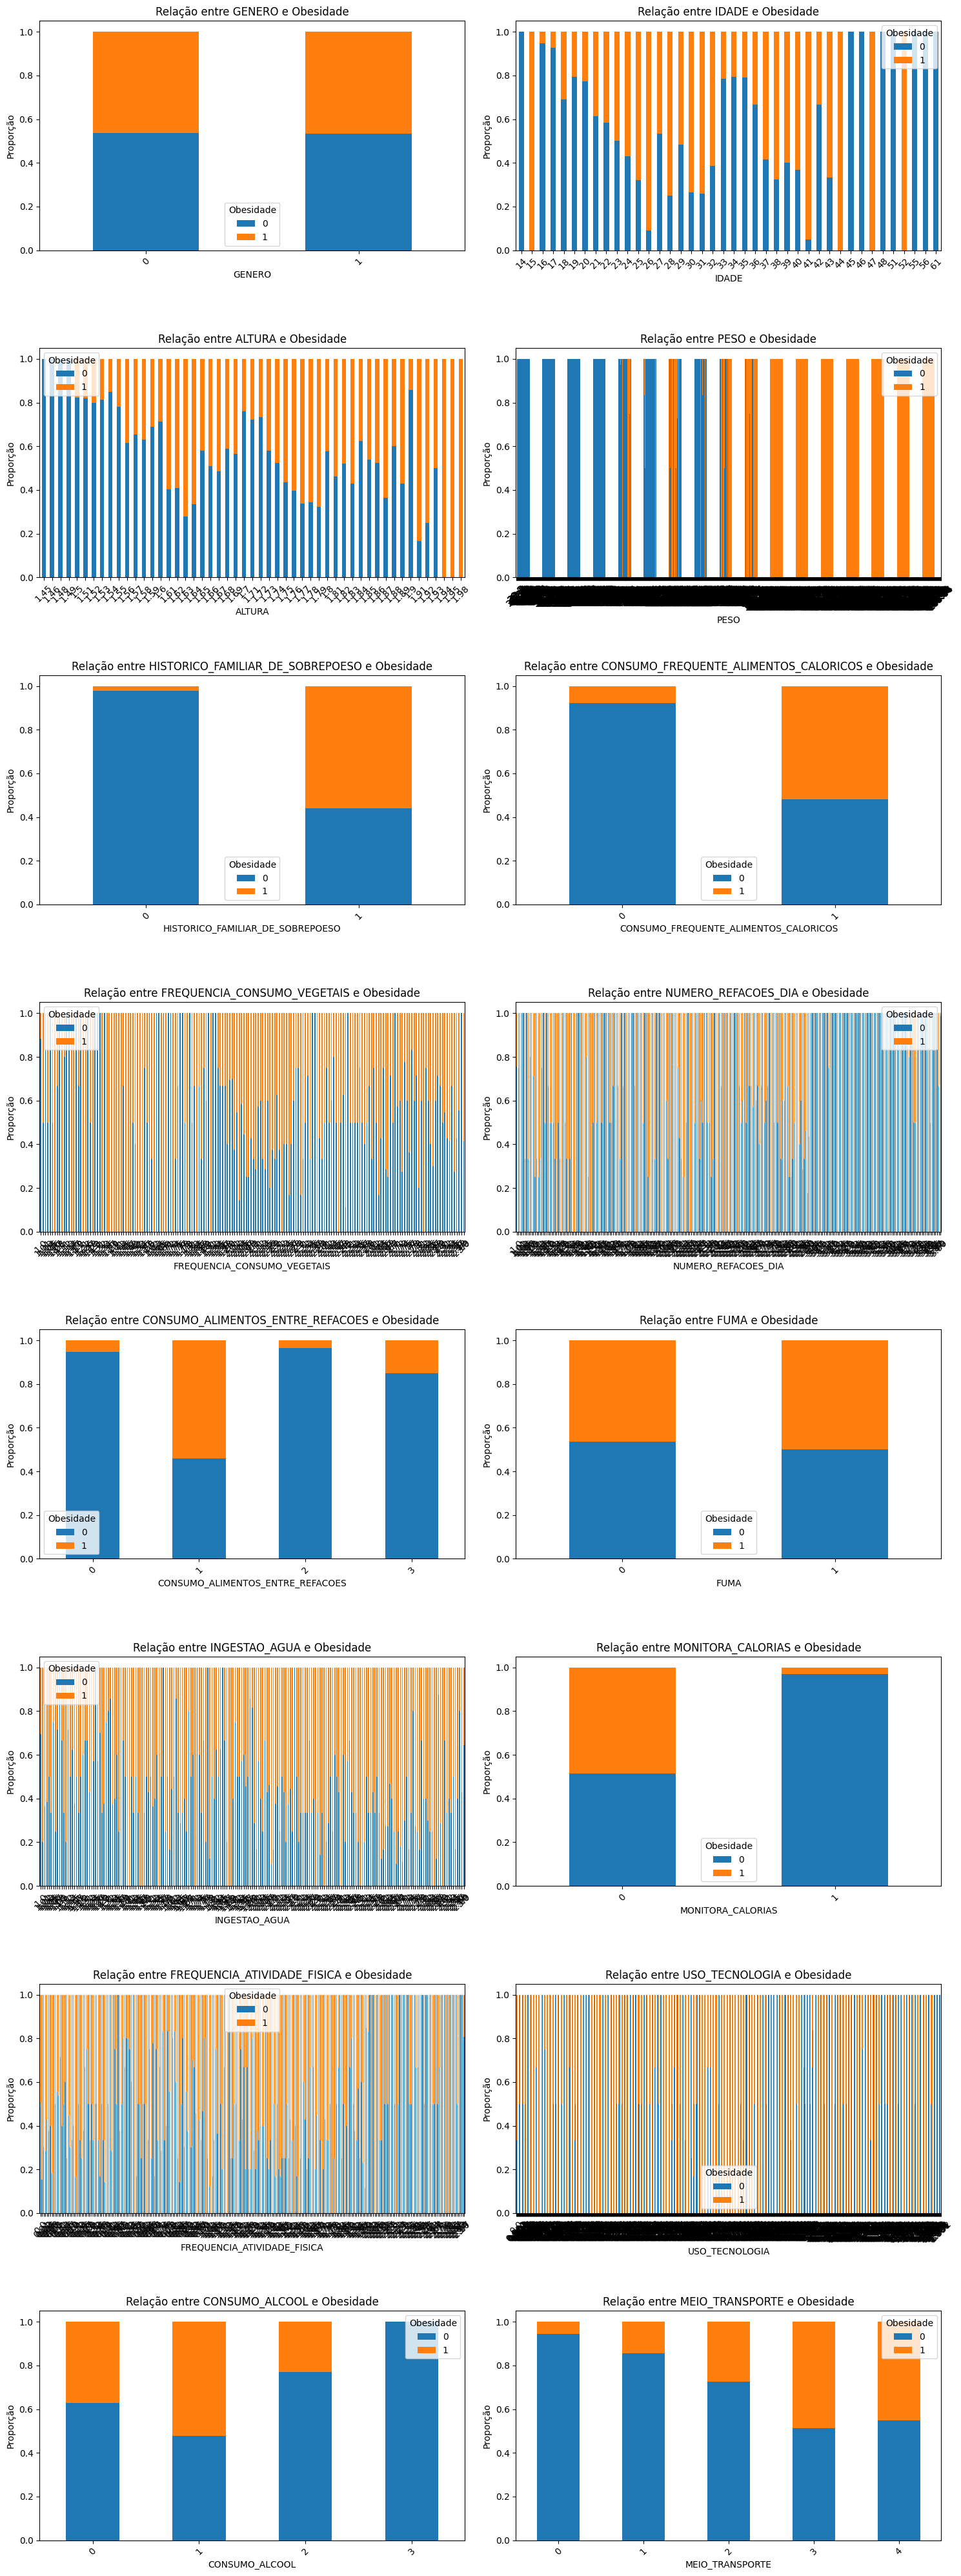

In [ ]:
def plot_all_columns_with_obesity_side_by_side(df, target_col):
    if 'BMI_bins' in df.columns:
                df.drop(columns=['BMI_bins'], inplace=True)
                
    columns = df.columns.drop(target_col)  # Exclui a coluna target ('Diabetes_binary')
    
    # Configuração para plotar dois gráficos por linha
    num_cols = 2
    num_rows = (len(columns) + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Define o tamanho da figura
    
    # Flatten axes para trabalhar com uma lista (necessário caso haja mais de uma linha)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        if col == 'BMI':
            # Agrupa os valores de BMI em intervalos de 5 unidades
            df['BMI_bins'] = pd.cut(df['BMI'], bins=range(10, 50, 5), right=False)
            cross_tab = pd.crosstab(df['BMI_bins'], df[target_col], normalize='index')
            cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
            axes[i].set_title(f'Relação entre {col} e Obesidade')
            axes[i].set_ylabel('Proporção')
            axes[i].set_xlabel('BMI (agrupado)')
            axes[i].legend(title='Obesidade')
            axes[i].tick_params(axis='x', rotation=45)
            
            # Remove a coluna BMI_bins após o gráfico ser gerado
            if 'BMI_bins' in df.columns:
                df.drop(columns=['BMI_bins'], inplace=True)
        
        else:
            # Para todas as outras colunas
            if df[col].nunique() > 1:  # Verifica se a coluna tem mais de uma categoria
                cross_tab = pd.crosstab(df[col], df[target_col], normalize='index')  # Tabela cruzada normalizada
                
                if not cross_tab.empty and cross_tab.shape[1] > 1:
                    cross_tab.plot(kind='bar', stacked=True, ax=axes[i])  # Cria gráfico de barras empilhadas no eixo correto
                    axes[i].set_title(f'Relação entre {col} e Obesidade')
                    axes[i].set_ylabel('Proporção')
                    axes[i].set_xlabel(col)
                    axes[i].legend(title='Obesidade')
                    axes[i].tick_params(axis='x', rotation=45)
                else:
                    axes[i].set_visible(False)

    # Remove os gráficos vazios caso o número de colunas seja ímpar
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Ajusta os espaçamentos entre as linhas de gráficos
    plt.tight_layout(h_pad=4)
    plt.show()

# Usando a função no seu DataFrame df_eda
plot_all_columns_with_obesity_side_by_side(df_train, 'POSSUI_OBESIDADE')

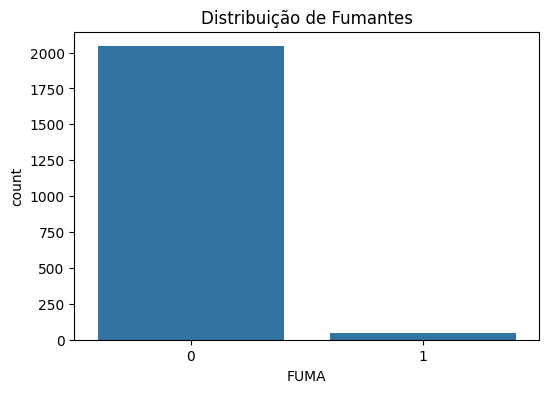

In [104]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_train, x='FUMA')
plt.title('Distribuição de Fumantes')
plt.show()

# Feature Engineering

In [105]:
# Separar features e target para análise de Features
X = df_train.drop('POSSUI_OBESIDADE', axis=1)
y = df_train['POSSUI_OBESIDADE']

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

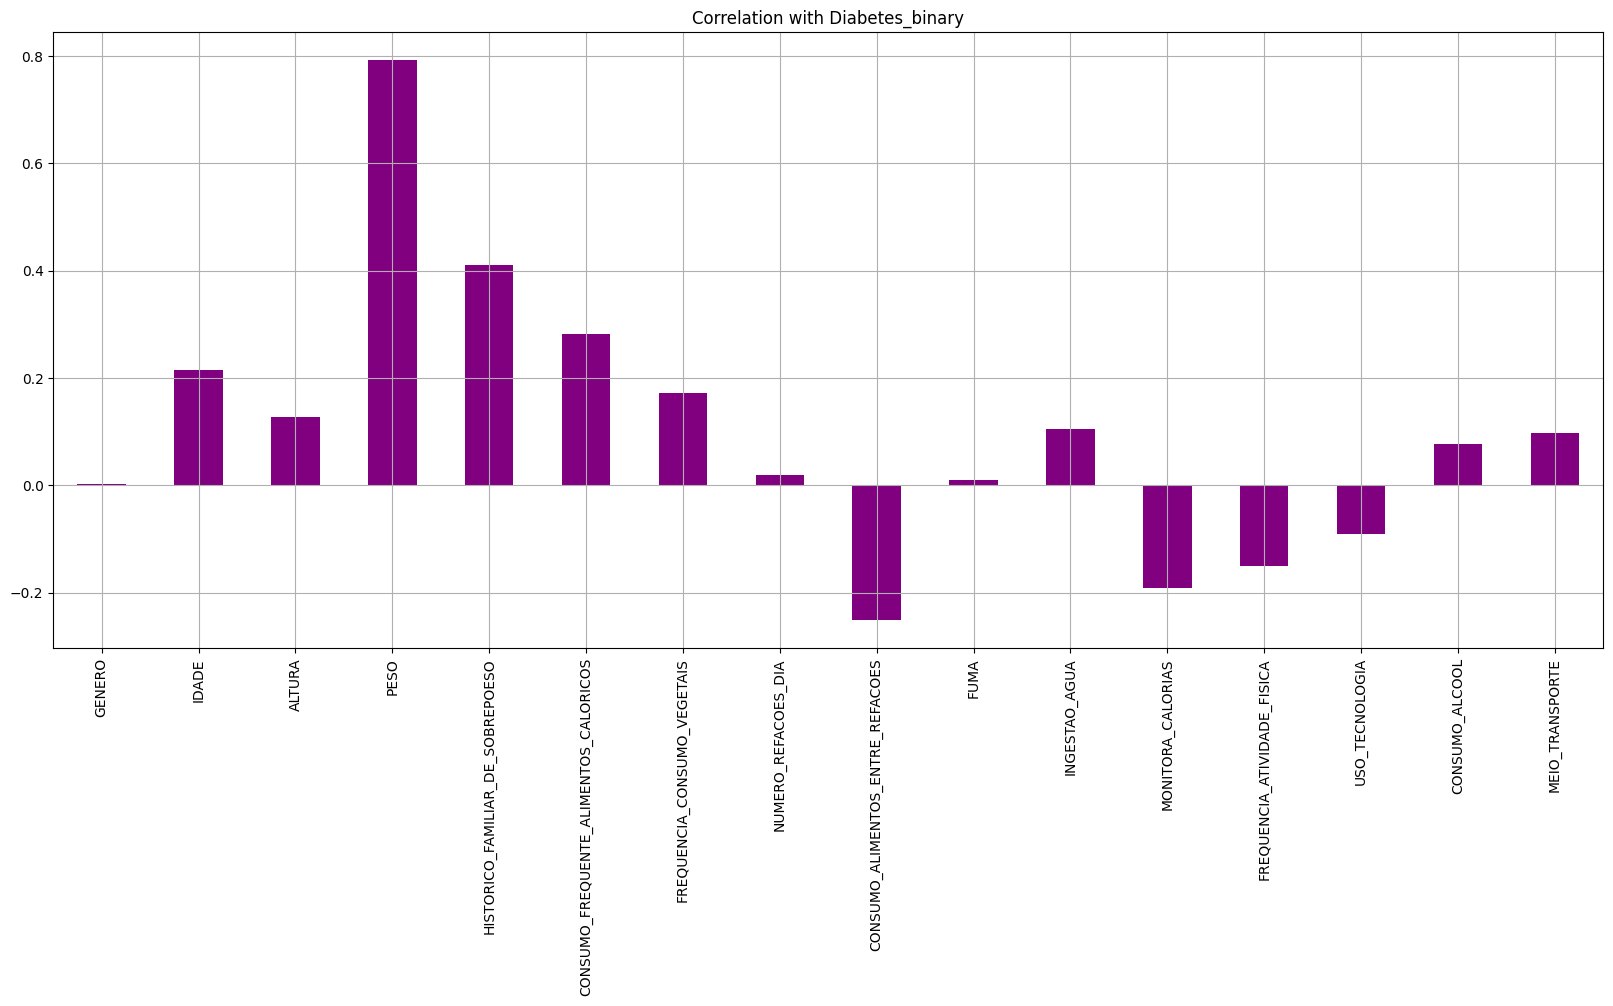

In [ ]:
# Selecionando features
df_train.drop('POSSUI_OBESIDADE', axis=1).corrwith(df_train.POSSUI_OBESIDADE).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Obesity",color="Purple")

In [107]:
# Avaliando features

from sklearn.feature_selection import SelectKBest, chi2
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)


f_Scores = pd.concat([df_columns,df_scores],axis=1)            
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,GENERO,0.004142
1,IDADE,160.880555
2,ALTURA,0.173541
3,PESO,10344.960648
4,HISTORICO_FAMILIAR_DE_SOBREPOESO,61.245609
5,CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS,19.329166
6,FREQUENCIA_CONSUMO_VEGETAIS,7.318611
7,NUMERO_REFACOES_DIA,0.162999
8,CONSUMO_ALIMENTOS_ENTRE_REFACOES,24.214340
9,FUMA,0.207550


In [108]:
print(f_Scores.nlargest(15,'Score'))

                                  Feature         Score
3                                    PESO  10344.960648
1                                   IDADE    160.880555
11                      MONITORA_CALORIAS     72.834168
4        HISTORICO_FAMILIAR_DE_SOBREPOESO     61.245609
12            FREQUENCIA_ATIVIDADE_FISICA     34.163775
8        CONSUMO_ALIMENTOS_ENTRE_REFACOES     24.214340
5   CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS     19.329166
13                         USO_TECNOLOGIA      9.780250
6             FREQUENCIA_CONSUMO_VEGETAIS      7.318611
14                         CONSUMO_ALCOOL      4.583611
10                          INGESTAO_AGUA      4.181874
15                        MEIO_TRANSPORTE      2.856612
9                                    FUMA      0.207550
2                                  ALTURA      0.173541
7                     NUMERO_REFACOES_DIA      0.162999


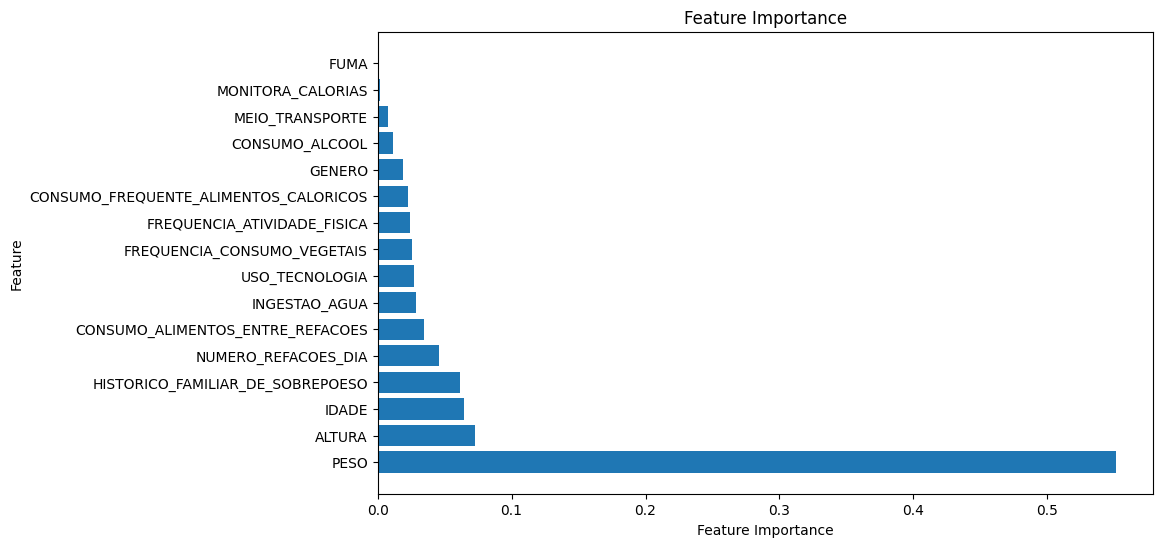

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Treina o modelo RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Calcula a importância das features
feature_importance = rf_classifier.feature_importances_

# Transforma o nome das colunas de X em uma lista
df_columns = X.columns

# Ordena as features pela importância
sorted_idx = np.argsort(feature_importance)[::-1]

# Gera o gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [110]:
# Removendo Colunas que podem nao agregar ao Modelo
columns = ["FUMA" , "MONITORA_CALORIAS" , "MEIO_TRANSPORTE"]
df_train = df_train.drop(columns=columns, axis=1)
df_train.head()

,GENERO,IDADE,ALTURA,PESO,HISTORICO_FAMILIAR_DE_SOBREPOESO,CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS,FREQUENCIA_CONSUMO_VEGETAIS,NUMERO_REFACOES_DIA,CONSUMO_ALIMENTOS_ENTRE_REFACOES,INGESTAO_AGUA,FREQUENCIA_ATIVIDADE_FISICA,USO_TECNOLOGIA,CONSUMO_ALCOOL,POSSUI_OBESIDADE
0,0,21,1.62,64.0,1,0,2.0,3.0,1,2.0,0.0,1.0,0,0
1,0,21,1.52,56.0,1,0,3.0,3.0,1,3.0,3.0,0.0,1,0
2,1,23,1.80,77.0,1,0,2.0,3.0,1,2.0,2.0,1.0,2,0
3,1,27,1.80,87.0,0,0,3.0,3.0,1,2.0,2.0,0.0,2,0
4,1,22,1.78,89.8,0,0,2.0,1.0,1,2.0,0.0,0.0,1,0


In [111]:
# Separar features e target para o Modelo
X = df_train.drop('POSSUI_OBESIDADE', axis=1)
y = df_train['POSSUI_OBESIDADE']

# Balanceando Target

In [112]:
y.value_counts()

POSSUI_OBESIDADE
0    1115
1     972
Name: count, dtype: int64

In [113]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,y)

In [114]:
y_sm.shape , x_sm.shape

((1944,), (1944, 13))

In [115]:
y_sm.value_counts()

POSSUI_OBESIDADE
0    972
1    972
Name: count, dtype: int64

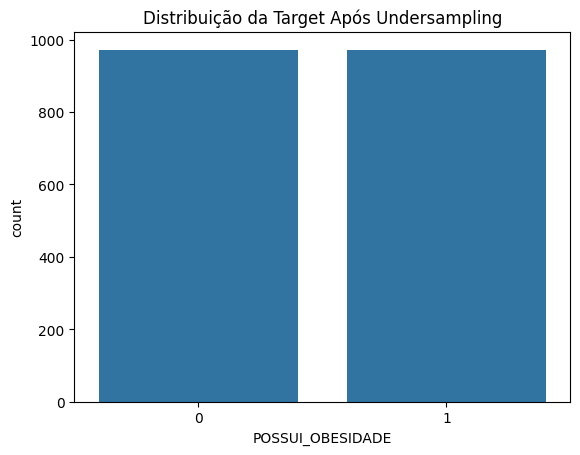

In [116]:
# Verificar a nova distribuição das classes
sns.countplot(x=y_sm)
plt.title('Distribuição da Target Após Undersampling')
plt.show()

Dados de treino e teste (70,30)

In [117]:
X_train , X_test , y_train , y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

In [118]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [119]:
import joblib

print(df_train.columns)
joblib.dump(scalar, 'scaler.pkl')

Index(['GENERO', 'IDADE', 'ALTURA', 'PESO', 'HISTORICO_FAMILIAR_DE_SOBREPOESO',
       'CONSUMO_FREQUENTE_ALIMENTOS_CALORICOS', 'FREQUENCIA_CONSUMO_VEGETAIS',
       'NUMERO_REFACOES_DIA', 'CONSUMO_ALIMENTOS_ENTRE_REFACOES',
       'INGESTAO_AGUA', 'FREQUENCIA_ATIVIDADE_FISICA', 'USO_TECNOLOGIA',
       'CONSUMO_ALCOOL', 'POSSUI_OBESIDADE'],
      dtype='object')


['scaler.pkl']

## Machine Learning (ML)

Matriz de confusão

In [120]:
def exibir_matriz_confusao(y_test, y_pred, nome_modelo):
    # Calcular a matriz de confusão
    matriz_confusao = confusion_matrix(y_test, y_pred)
    
    # Criar um DataFrame para uma melhor visualização
    df_matriz_confusao = pd.DataFrame(matriz_confusao,
                                      index=[f'Classe {i}' for i in range(matriz_confusao.shape[0])],
                                      columns=[f'Classe {i}' for i in range(matriz_confusao.shape[1])])
    
    # Exibir a matriz de confusão
    print(f"\nMatriz de Confusão para {nome_modelo}:")
    print(df_matriz_confusao)

SVM

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Pontuações de Validação Cruzada: [0.99264706 0.97794118 0.97794118 0.98529412 0.98529412]
Média das Pontuações de Validação Cruzada: 0.9838235294117649

Matriz de Confusão para Modelo SVC:
          Classe 0  Classe 1
Classe 0       287         0
Classe 1         5       292


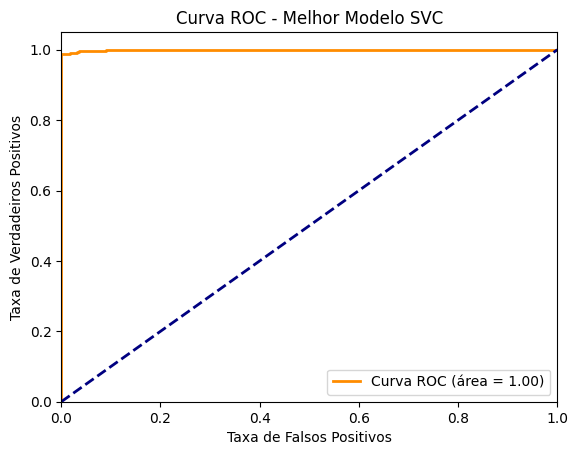

Melhor modelo: SVC(C=10, class_weight={0: 1, 1: 1.5}, probability=True, random_state=42)
Acurácia: 0.9914383561643836

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       287
           1       1.00      0.98      0.99       297

    accuracy                           0.99       584
   macro avg       0.99      0.99      0.99       584
weighted avg       0.99      0.99      0.99       584



In [121]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

def tune_svc_hyperparameters(x_train, y_train, x_test, y_test, parameters, cv_folds=5, random_state=42):
    # Criar o modelo SVC com probabilidade ativada
    svc = SVC(probability=True, random_state=random_state)

    # Configurar o GridSearchCV
    grid_search = GridSearchCV(svc, parameters, cv=cv_folds, scoring='accuracy', n_jobs=-1, verbose=1)

    # Treinar o modelo com GridSearchCV
    grid_search.fit(x_train, y_train.values.ravel())

    # Obter o melhor modelo
    best_model = grid_search.best_estimator_

    # Avaliar o desempenho do modelo com validação cruzada
    cv_scores = cross_val_score(best_model, x_train, y_train.values.ravel(), cv=cv_folds, scoring='accuracy')
    print("Pontuações de Validação Cruzada:", cv_scores)
    print("Média das Pontuações de Validação Cruzada:", cv_scores.mean())

    # Avaliar o desempenho do modelo no conjunto de teste
    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)[:, 1]  # Probabilidades para a classe positiva
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Exibir a matriz de confusão
    exibir_matriz_confusao(y_test, y_pred, "Modelo SVC")

    # Calcular e plotar a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC - Melhor Modelo SVC')
    plt.legend(loc='lower right')
    plt.show()
    
    return best_model, accuracy, report

# Parâmetros para o GridSearchCV
parameters = {
    'C': [10], 
    'probability': [True],
    'class_weight': [{0: 1, 1: 1.5}]  # Penalidade maior para a classe 1
}

# Ajustar o modelo
best_model, accuracy, report = tune_svc_hyperparameters(
    X_train, y_train, X_test, y_test, parameters
)

print("Melhor modelo:", best_model)
print("Acurácia:", accuracy)
print("\nRelatório de Classificação:\n", report)

Salva o modelo

In [122]:
import joblib
# Salvar o modelo treinado

joblib.dump(best_model, 'svc_modelo_obesidade.pkl')

['svc_modelo_obesidade.pkl']